In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


In [8]:
X_train = pd.read_csv('../data/processed/test_processed.csv')
y_train = pd.read_csv('../data/processed/test_processed_target.csv')

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df = X_train.join(y_train)
sampled = pd.concat([
    df[df['Class'] == 0].sample(3, random_state=42),
    df[df['Class'] == 1].sample(2, random_state=42)
])
sampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
14868,131941.0,1.427126,-0.919876,-3.165507,1.378848,0.867670,-0.880074,1.482888,-0.569838,-0.018398,0.259636,-2.047756,-1.029194,-1.608184,1.256592,0.001224,-0.491731,-0.437132,0.055290,-0.077654,0.395290,0.453192,0.580948,-0.664473,-1.036310,0.811282,-0.162522,-0.134535,-0.026835,385.00,0
10516,122469.0,1.808834,-1.333030,-0.556548,-0.165515,-1.388384,-0.731744,-0.663268,-0.092321,0.479492,0.517942,-1.298224,-0.450947,-0.990599,0.196415,0.730369,-1.364912,-0.205982,1.373245,-0.766320,-0.424837,-0.503476,-1.234127,0.331022,-0.161604,-0.565929,-0.989281,0.043581,0.000009,158.94,0
16749,35541.0,1.028807,-0.167460,1.344620,1.649794,-0.717662,0.807931,-0.610833,0.397065,0.923157,-0.257201,0.836488,1.932633,-0.024126,-0.606660,-2.460290,-1.027777,0.577445,-0.971095,0.385403,-0.188325,-0.348086,-0.536813,0.095209,0.228722,0.381645,-0.540081,0.090843,0.020739,7.40,0
42712,41138.0,-4.595617,5.083690,-7.581015,7.546033,-6.949165,-1.729185,-8.190192,2.714670,-7.083169,-11.141278,7.381859,-14.468655,0.299660,-13.602211,0.516113,-13.563273,-23.815636,-9.170557,3.669523,1.682160,2.248971,0.566844,0.033744,0.591783,0.334229,0.386801,2.163898,0.983104,340.11,1
28867,91502.0,0.007379,2.365183,-2.600287,1.111602,3.276441,-1.776141,2.114531,-0.830084,0.900490,-3.376177,2.056812,-3.984257,1.021968,-5.967905,-1.151608,1.679740,5.586115,2.789131,-2.241075,-0.006388,-0.563944,-0.902100,-0.404382,-0.012944,0.589836,-0.734449,-0.447529,-0.362375,1.00,1


In [3]:
X_train.shape

(227845, 30)

In [4]:
df = pd.read_csv('../data/raw/creditcard.csv')

In [27]:
# Dividindo o dataframe em features e target
# axis=1 indica que estamos removendo colunas
# errors='ignore' evita erros caso as colunas não existam
# removemos a coluna 'id' e a coluna 'Class' (target) pois nao sao importantes para as features
X = df.drop(['id', 'Class'], axis=1, errors='ignore')
y = df['Class']

In [28]:
# Printar os features que foram selecionados
print(X.columns.tolist())

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [29]:
# Dividindo os dados em treino e teste
# Padrao de 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
print(X_train.shape)
print(X_test.shape)


(227845, 30)
(56962, 30)


In [31]:
# Forca a padronizacao dos dados, para que tenham o mesmo peso na modelagem
# StandardScaler remove a media e escala para unit variance

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
print(pd.Series(y_train).value_counts(normalize=True))

Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64


In [ ]:
# Configurando o modelo Random Forest
# 100 arvores, profundidade maxima de 10, minimo de 10 amostras para dividir um no
# esses valores foram escolhidos pois, antes dos testes iniciais, pareciam razoaveis para evitar overfitting
# link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=,
    max_depth=10,
    min_samples_split=10,
    class_weight='balanced',
    n_jobs=-1
)

In [ ]:
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='f1')
print(f'Cross-validation F1 scores: {cv_scores}')
print(f'Mean CV F1 score: {np.average(cv_scores)}')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Use PR-AUC como métrica (melhor para dados desbalanceados)
from sklearn.metrics import make_scorer, average_precision_score

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, 25,],
    'min_samples_split': [5, 10, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', 'balanced_subsample']
}

pr_auc_scorer = make_scorer(average_precision_score, needs_proba=True)

rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    scoring=pr_auc_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_scaled, y_train)

c:\Workspace\Desafio\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'max_depth': [10, 15, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [5, 10, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",30
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'f1'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used h

In [22]:
rf_model.fit(X_train_scaled, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [41]:
y_pred = random_search.predict(X_test_scaled)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.79      0.83        98

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



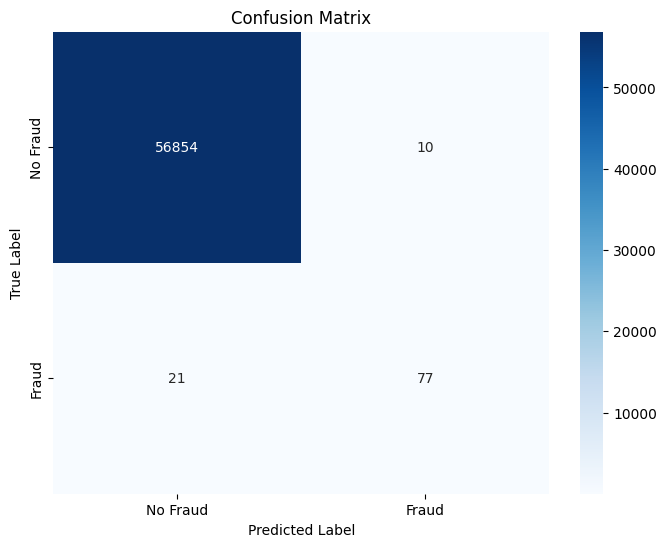

In [43]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
